In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}

mpl.rcParams['legend.numpoints'] = 1







In [3]:
local_sol = ['S0927', 'S1306', 'U0148', 'U1319']


zbin_bound_low  = np.array([4.35, 5.19])
zbin_bound_high = np.array([5.19, 6.13])
atoms = ['c4', 'si4']


real = pd.read_csv('/Users/alex/Desktop/final_files/correct_precision/paper2/all_components_file_with_completeness_aug22.csv')
cddf_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/cddf_input_tables/'
plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/plots/cbar_by_cd_z/'

hfont = {'fontname':'Times New roman'}




/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/cddf_input_tables/c4_comp_z1.csv
   zmin  zmax    cd      comp
0     4  5.19  12.5  0.400818
1     4  5.19  12.6  0.453900
2     4  5.19  12.7  0.472441
3     4  5.19  12.8  0.553914
/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/cddf_input_tables/c4_comp_z2.csv
   zmin  zmax    cd      comp
6  5.19  6.13  13.1  0.411083
7  5.19  6.13  13.2  0.471237
8  5.19  6.13  13.3  0.544309
/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/cddf_input_tables/si4_comp_z1.csv
   zmin  zmax    cd      comp
3     4  5.19  12.5  0.434010
4     4  5.19  12.6  0.509398
/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/cddf_input_tables/si4_comp_z2.csv
    zmin  zmax    cd      comp
2   5.19  6.13  12.4  0.449526
3   5.19  6.13  12.5  0.536841
15  5.19  6.13  13.7  0.537576


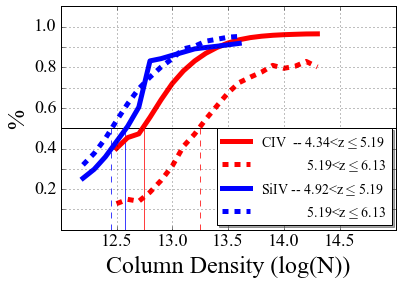

In [20]:
ylabels = [' ', '0.2', ' ', '0.4', ' ', '0.6', ' ', '0.8', ' ', '1.0']
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ylabels, **hfont, fontsize = 18)

xlabels = ['12.5', '13.0', '13.5', '14.0', '14.5']
plt.xticks([12.5, 13.0, 13.5, 14.0, 14.5], xlabels, **hfont, fontsize = 18)


plt.grid(True)


plt.ylim([0.0,1.1] )
plt.xlim([12,15])


plt.ylabel('%', **hfont,  fontsize=24)
plt.xlabel('Column Density (log(N))', **hfont,  fontsize=24)

plt.plot([0, 100], [0.5, 0.5], 'k-', lw=1)
plt.plot([12.75, 12.75], [0, 0.5], 'r-', lw=0.75)
plt.plot([13.25, 13.25], [0, 0.5], 'r--', lw=0.75)

plt.plot([12.58, 12.58], [0, 0.5], 'b-', lw=0.75)
plt.plot([12.45, 12.45], [0, 0.5], 'b--', lw=0.75)


        
plotname = plot_path + 'cbar_by_cd_z.png'
for a in range(0, len(atoms)):
    for z in range(0, len(zbin_bound_low)):
        input_name = cddf_path + atoms[a] + '_comp_z' + str(z+1) + '.csv'
        local_results = pd.read_csv(input_name)
        print(input_name)
        print(local_results.loc[(local_results.comp > 0.4) & (local_results.comp < 0.6)])
        
        
        
        if a == 0: 
            if z ==0:
                plt.plot(local_results[0:len(local_results.cd)-1].cd, 
                     local_results[0:len(local_results.cd)-1].comp,  
                     'r-', markersize=10, alpha=1.0, lw = 5, label='CIV  -- 4.34<z$\leq$5.19')  

            if z ==1:
                plt.plot(local_results[0:len(local_results.cd)-1].cd, 
                     local_results[0:len(local_results.cd)-1].comp,  
                     'r--', markersize=10, alpha=1.0, lw = 5, label='             5.19<z$\leq$6.13')

        if a == 1: 
            if z ==0:
                plt.plot(local_results[0:len(local_results.cd)-1].cd, 
                     local_results[0:len(local_results.cd)-1].comp,  
                     'b-', markersize=10, alpha=1.0, lw = 5, label='SiIV -- 4.92<z$\leq$5.19')   

            if z ==1:
                plt.plot(local_results[0:len(local_results.cd)-1].cd, 
                     local_results[0:len(local_results.cd)-1].comp,  
                     'b--', markersize=10, alpha=1.0, lw = 5, label='             5.19<z$\leq$6.13') 
 

# add legend
plt.rc('legend',**{'fontsize':14})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(1.07, -0.1), loc=4, borderaxespad=1.9, shadow=True)


plt.savefig(plotname, bbox_inches='tight', figsize=[12, 6], dpi=500)
